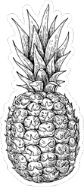

In [41]:
using ImageMagick, Images, ImageTransformations
download("https://dejpknyizje2n.cloudfront.net/marketplace/products/vector-hand-drawn-pineapple-sticker-1539367083.350258.png", "myimg.png")
im = imresize(load("myimg.png"), ratio=0.75)

In [43]:
img = Int.(round.(Gray.(im)))
y = vcat(img...)
length(y)

15708

In [49]:
include("../code/headers.jl")
q = 2
n = length(y)
R = 0.3
m = Int(round(n*(1-R)))
seed = 234

234

In [45]:
lm = LossyModel(q, n, m, y=y)
algo = MS(maxiter=100, Tmax=1)

MS
  maxiter: Int64 100
  convergence: Symbol parity
  nmin: Int64 300
  tol: Float64 1.0e-12
  gamma: Float64 0.01
  Tmax: Int64 1
  beta2: Float64 1.0
  sigma: Float64 0.0001
  default_distortion: naive_compression_distortion (function of type typeof(naive_compression_distortion))


In [ ]:
solve!(lm, algo, randseed=seed, verbose=true)

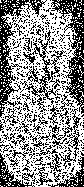

In [65]:
compressed = reshape(lm.x, size(img))
Gray.(compressed)

In [67]:
nb = newbasis(lm)
A = gfmatrixmult(permutedims(nb),nb)

LoadError: InterruptException: